In [105]:
%matplotlib inline

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

# Introduction to Deep Learning
## Live Demos

In [107]:
# (2a + 3b)^2

In [108]:
a = tf.constant(300)
b = tf.constant(100)

In [109]:
tf.pow(tf.add(tf.multiply(2, a), tf.multiply(3, b)), 2)

<tf.Tensor: shape=(), dtype=int32, numpy=810000>

In [110]:
(2 * 30 + 3 * 10) ** 2

8100

In [111]:
(2 * a + 3 * b) ** 2

<tf.Tensor: shape=(), dtype=int32, numpy=810000>

In [112]:
bank_data = pd.read_csv("data/bank.csv", sep = ";", true_values = ["yes"], false_values = ["no"])

In [113]:
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,False,1787,False,False,cellular,19,oct,79,1,-1,0,unknown,False
1,33,services,married,secondary,False,4789,True,True,cellular,11,may,220,1,339,4,failure,False
2,35,management,single,tertiary,False,1350,True,False,cellular,16,apr,185,1,330,1,failure,False
3,30,management,married,tertiary,False,1476,True,True,unknown,3,jun,199,4,-1,0,unknown,False
4,59,blue-collar,married,secondary,False,0,True,False,unknown,5,may,226,1,-1,0,unknown,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,False,-333,True,False,cellular,30,jul,329,5,-1,0,unknown,False
4517,57,self-employed,married,tertiary,True,-3313,True,True,unknown,9,may,153,1,-1,0,unknown,False
4518,57,technician,married,secondary,False,295,False,False,cellular,19,aug,151,11,-1,0,unknown,False
4519,28,blue-collar,married,secondary,False,1137,False,False,cellular,6,feb,129,4,211,3,other,False


In [114]:
bank_data.shape

(4521, 17)

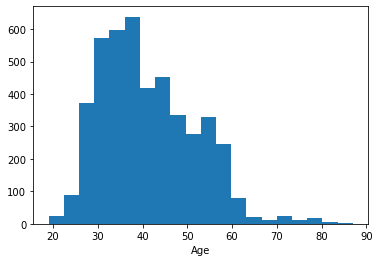

In [115]:
plt.hist(bank_data.age, bins = 20)
plt.xlabel("Age")
plt.show()

In [116]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default        bool
balance       int64
housing        bool
loan           bool
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y              bool
dtype: object

In [117]:
bank_data = pd.get_dummies(bank_data)

In [118]:
bank_data.shape

(4521, 49)

In [119]:
bank_data = bank_data.astype(np.float64)

In [120]:
bank_data.dtypes

age                    float64
default                float64
balance                float64
housing                float64
loan                   float64
day                    float64
duration               float64
campaign               float64
pdays                  float64
previous               float64
y                      float64
job_admin.             float64
job_blue-collar        float64
job_entrepreneur       float64
job_housemaid          float64
job_management         float64
job_retired            float64
job_self-employed      float64
job_services           float64
job_student            float64
job_technician         float64
job_unemployed         float64
job_unknown            float64
marital_divorced       float64
marital_married        float64
marital_single         float64
education_primary      float64
education_secondary    float64
education_tertiary     float64
education_unknown      float64
contact_cellular       float64
contact_telephone      float64
contact_

In [121]:
attributes = bank_data.drop(["y"], axis = 1)

In [122]:
labels = bank_data["y"]

In [123]:
min_max_scale = lambda col: (col - tf.reduce_min(col)) / (tf.reduce_max(col) - tf.reduce_min(col))

In [124]:
num_columns = attributes.shape[1]
transformed_columns = [min_max_scale(attributes.values[:, i]) for i in range(num_columns)]

In [125]:
bank_data_transformed = tf.stack(transformed_columns, axis = 1)

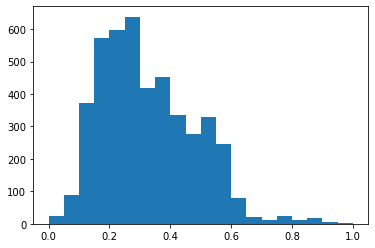

In [126]:
plt.hist(bank_data_transformed.numpy()[:, 0], bins = 20)
plt.show()

In [127]:
bank_data_transformed.shape

TensorShape([4521, 48])

In [128]:
labels = labels.astype(int).values

In [129]:
labels_onehot = tf.one_hot(labels, depth = 2)

In [130]:
logistic_regression = Sequential([
    Input(shape = num_columns),
    Dense(2, activation = "sigmoid")
])

In [131]:
logistic_regression.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 2)                 98        
Total params: 98
Trainable params: 98
Non-trainable params: 0
_________________________________________________________________


In [132]:
logistic_regression.compile(optimizer = "adam", loss = "categorical_crossentropy")

In [133]:
logistic_regression.fit(x = bank_data_transformed, y = labels_onehot, epochs = 10)

Epoch 1/10
142/142 [==============================] - 0s 373us/step - loss: 0.5800
Epoch 2/10
142/142 [==============================] - 0s 366us/step - loss: 0.4040
Epoch 3/10
142/142 [==============================] - 0s 366us/step - loss: 0.3553
Epoch 4/10
142/142 [==============================] - 0s 373us/step - loss: 0.3402
Epoch 5/10
142/142 [==============================] - 0s 373us/step - loss: 0.3327
Epoch 6/10
142/142 [==============================] - 0s 380us/step - loss: 0.3271
Epoch 7/10
142/142 [==============================] - 0s 387us/step - loss: 0.3225
Epoch 8/10
142/142 [==============================] - 0s 387us/step - loss: 0.3182
Epoch 9/10
142/142 [==============================] - 0s 359us/step - loss: 0.3143
Epoch 10/10
142/142 [==============================] - 0s 359us/step - loss: 0.3108


In [134]:
logistic_regression.layers[0].kernel

<tf.Variable 'dense_15/kernel:0' shape=(48, 2) dtype=float32, numpy=
array([[-0.27917787, -0.4324179 ],
       [ 0.15534145,  0.11314678],
       [ 0.30110922, -0.2610012 ],
       [-0.0367644 , -0.36514223],
       [ 0.00842612, -0.3377608 ],
       [-0.03704702, -0.51356226],
       [-0.3759656 ,  0.6691498 ],
       [ 0.37003353, -0.7173715 ],
       [ 0.17556043,  0.23472401],
       [-0.08876778,  0.00527608],
       [ 0.32146212, -0.25992242],
       [ 0.2874744 , -0.20971791],
       [ 0.02281139, -0.3339037 ],
       [ 0.1433824 , -0.25461933],
       [ 0.18219939, -0.4042241 ],
       [-0.16552946,  0.00097092],
       [-0.00948698, -0.4361626 ],
       [ 0.28673634, -0.2414991 ],
       [ 0.11861504, -0.11056776],
       [ 0.3039529 , -0.2414181 ],
       [-0.18020439, -0.45023733],
       [-0.22525473,  0.08020172],
       [ 0.25837308,  0.1409523 ],
       [ 0.26049948, -0.08579326],
       [ 0.18353362,  0.08350851],
       [ 0.29394865, -0.58240384],
       [-0.10879879, 

In [135]:
neural_network = Sequential([
    Input(shape = num_columns),
    Dense(30, activation = "relu"),
    Dense(20, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(2, activation = "sigmoid")
])

In [136]:
neural_network.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 30)                1470      
_________________________________________________________________
dense_17 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 22        
Total params: 2,322
Trainable params: 2,322
Non-trainable params: 0
_________________________________________________________________


In [137]:
neural_network.compile(optimizer = "adam", loss = "categorical_crossentropy")

In [138]:
neural_network.fit(x = bank_data_transformed, y = labels_onehot, epochs = 10)

Epoch 1/10
142/142 [==============================] - 0s 472us/step - loss: 0.4756
Epoch 2/10
142/142 [==============================] - 0s 458us/step - loss: 0.3178
Epoch 3/10
142/142 [==============================] - 0s 465us/step - loss: 0.2987
Epoch 4/10
142/142 [==============================] - 0s 472us/step - loss: 0.2767
Epoch 5/10
142/142 [==============================] - 0s 479us/step - loss: 0.2547
Epoch 6/10
142/142 [==============================] - 0s 479us/step - loss: 0.2377
Epoch 7/10
142/142 [==============================] - 0s 486us/step - loss: 0.2254
Epoch 8/10
142/142 [==============================] - 0s 486us/step - loss: 0.2183
Epoch 9/10
142/142 [==============================] - 0s 465us/step - loss: 0.2130
Epoch 10/10
142/142 [==============================] - 0s 458us/step - loss: 0.2075
